# **Hand Written Digits Classification MODEL**

In [5]:
# Importing the TensorFlow library, a popular framework for deep learning and machine learning.
import tensorflow as tf

In [8]:
# Loading the MNIST dataset, a collection of 70,000 labeled handwritten digits
# (60,000 for training and 10,000 for testing), widely used in image processing and machine learning.
mnist = tf.keras.datasets.mnist

In [9]:
# Loading the MNIST dataset and splitting it into training and testing sets.
# x_train and x_test contain the images of digits (28x28 grayscale images).
# y_train and y_test contain the corresponding labels (digits from 0 to 9).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# Checking the shape of the training data.
# This returns a tuple representing the dimensions of x_train.
# For MNIST, it should be (60000, 28, 28), where:
# - 60000 is the number of training samples,
# - 28x28 are the dimensions of each image.
x_train.shape

(60000, 28, 28)

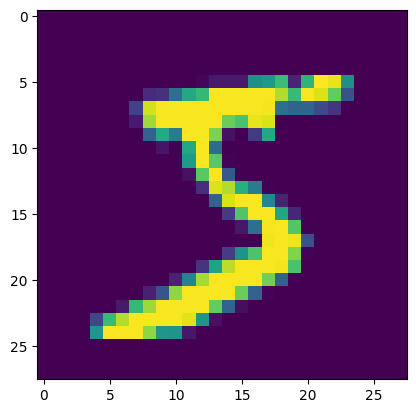

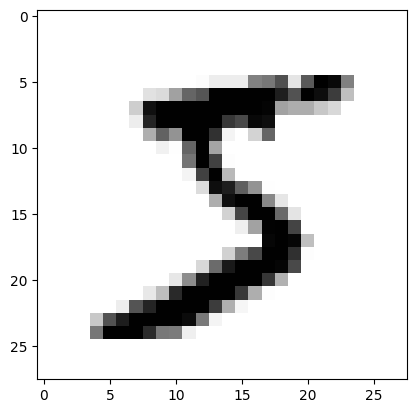

In [13]:
# Importing the Matplotlib library to visualize data.
import matplotlib.pyplot as plt

# Displaying the first image in the training dataset (x_train[0]) using imshow.
# By default, this will display the image in color (even though the dataset is grayscale).
plt.imshow(x_train[0])  # Render the image with colors
plt.show()  # Show the rendered image in a pop-up window

# Displaying the same image, but using a binary (black and white) color map for better contrast.
# cmap = plt.cm.binary specifies the grayscale rendering style.
plt.imshow(x_train[0], cmap=plt.cm.binary)  # Render the image in black and white

In [15]:
# Checking the pixel values of the first image in the training dataset (x_train[0]).
# Each pixel value in the MNIST dataset ranges from 0 to 255, where:
# - 0 represents black,
# - 255 represents white,
# - Values in between represent different shades of gray.
# This step is done before normalization to observe the raw pixel values.
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

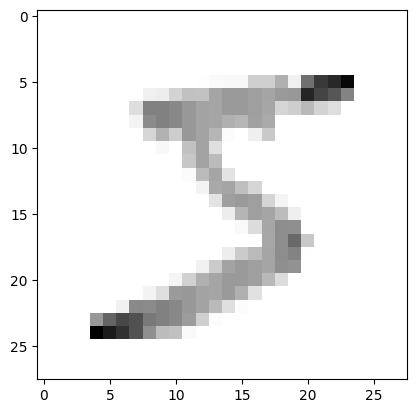

In [17]:
# Normalizing the pixel values of the training and testing datasets to a range of 0 to 1.
# Normalization helps the model train faster and improves performance by scaling the input data.
# axis=1 ensures normalization is applied along each row (per image).
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Displaying the first normalized image in the training dataset.
# The image is shown in black and white (binary colormap).
# After normalization, the pixel values will be in the range [0, 1].
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [18]:
# Displaying the pixel values of the first image in the training dataset (x_train[0]) after normalization.
# After normalization, all pixel values are scaled to a range between 0 and 1,
# where 0 represents the darkest pixel (black) and 1 represents the brightest pixel (white).
# This helps ensure consistent input ranges for the neural network, improving model training.
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
# Displaying the label (digit) corresponding to the first image in the training dataset (y_train[0]).
# y_train contains the labels for the training images, where each label is an integer representing the digit.
# For example, if the output is 5, it means that the first image in x_train corresponds to the digit '5'.
print(y_train[0])

5


In [21]:
# Importing the numpy library for array manipulation
import numpy as np

# Defining the image size (28x28 pixels), which is the original size of the MNIST images.
IMG_SIZE = 28

# Reshaping the training and testing datasets to fit the input format for a Convolutional Neural Network (CNN).
# The new shape is (-1, IMG_SIZE, IMG_SIZE, 1), where:
# - -1 means the number of samples is inferred automatically,
# - IMG_SIZE x IMG_SIZE are the dimensions of the image (28x28),
# - 1 represents the single channel (grayscale) of the images.
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Printing the new dimensions of the training and testing datasets.
# The output will show the number of samples and the image dimensions (28x28x1).
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [23]:
# Importing necessary modules from TensorFlow's Keras API to build a Convolutional Neural Network (CNN).

# Sequential model allows stacking layers on top of each other in a linear fashion.
from tensorflow.keras.models import Sequential

# Dense layer is a fully connected layer, where every input is connected to every output.
from tensorflow.keras.layers import Dense

# Dropout layer helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
from tensorflow.keras.layers import Dropout

# Activation function is applied to each layer to introduce non-linearity.
from tensorflow.keras.layers import Activation

# Flatten layer is used to convert the 2D matrix of image data into a 1D vector.
from tensorflow.keras.layers import Flatten

# Conv2D layer is used for convolution operations, primarily for feature extraction from image data.
from tensorflow.keras.layers import Conv2D

# MaxPooling2D layer reduces the dimensionality by taking the maximum value from a pool of values, aiding in computation efficiency.
from tensorflow.keras.layers import MaxPooling2D

In [29]:
# Create a Sequential model for the Convolutional Neural Network (CNN).
# This model is built layer by layer, where each layer feeds into the next.
model = Sequential()

# First Convolution Layer:
# Conv2D applies 64 filters of size 3x3 to extract features from input images.
# input_shape specifies the shape of input data for the first layer.
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))  # Specify input shape only for the first layer
model.add(Activation('relu'))  # ReLU activation function (ReLU sets negative values to 0 and keeps positive values)
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling2D reduces the size by selecting the max value in 2x2 windows.

# Second Convolution Layer:
# Another Conv2D layer with 64 filters of size 3x3 to further extract features.
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))  # ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 window

# Third Convolution Layer:
# Another Conv2D layer with 64 filters of size 3x3 to learn higher-level features.
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))  # ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 window

# Flattening the 2D feature maps into a 1D vector to pass into fully connected layers.
model.add(Flatten())

# First Fully Connected (Dense) Layer:
# A fully connected layer with 64 neurons and ReLU activation.
model.add(Dense(64))
model.add(Activation('relu'))

# Second Fully Connected (Dense) Layer:
# A fully connected layer with 32 neurons and ReLU activation.
model.add(Dense(32))
model.add(Activation('relu'))

# Output Layer:
# The final Dense layer with 10 neurons (one for each class: digits 0-9).
# Softmax activation function is used for multi-class classification, giving the probability of each class.
model.add(Dense(10))
model.add(Activation('softmax'))  # Softmax activation to produce a probability distribution over 10 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Displaying the summary of the model, which provides details about the layers,
# the number of parameters in each layer, and the total number of parameters in the model.
# This helps to understand the architecture and the complexity of the model.
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Printing the total number of training samples in the reshaped training dataset (x_trainr).
# This gives us an idea of how many images will be used for training the model.
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [35]:
# Compiling the model to prepare it for training.
# - loss: "sparse_categorical_crossentropy" is used for multi-class classification problems with integer labels.
#         It calculates the difference between the predicted probabilities and the actual class labels.
# - optimizer: "adam" is a popular optimization algorithm that adjusts the learning rate during training.
# - metrics: We use "accuracy" as the evaluation metric to track the percentage of correct predictions during training.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Training the model using the training dataset (x_trainr and y_train).
# - x_trainr: The reshaped training images (28x28x1).
# - y_train: The corresponding labels for the training images (0-9).
# - epochs=5: The number of times the model will train on the entire dataset (5 iterations).
# - validation_split=0.3: 30% of the training data will be used for validation during training,
#   allowing us to track how well the model is performing on unseen data.
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.7807 - loss: 0.6774 - val_accuracy: 0.9549 - val_loss: 0.1497
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9671 - loss: 0.1055 - val_accuracy: 0.9752 - val_loss: 0.0813
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9798 - val_loss: 0.0676
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9826 - loss: 0.0553 - val_accuracy: 0.9799 - val_loss: 0.0673
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9824 - val_loss: 0.0601


In [37]:
# Evaluating the trained model on the test dataset (x_testr and y_test).
# - x_testr: The reshaped test images (28x28x1).
# - y_test: The corresponding labels for the test images (0-9).
# The evaluate function returns two values:
# - test_loss: The loss value for the test dataset (how well the model predicts).
# - test_acc: The accuracy value on the test dataset (the percentage of correct predictions).
test_loss, test_acc = model.evaluate(x_testr, y_test)

# Printing the test loss and test accuracy after evaluating the model on the test samples.
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9807 - loss: 0.0694
Test Loss on 10,000 test samples 0.05634094774723053
Validation Accuracy on 10,000 test samples 0.9835000038146973


In [38]:
# Making predictions on the test dataset (x_testr) using the trained model.
# The model will output predicted probabilities for each class (0-9) for each test image.
# The result is an array of predicted probabilities for each image in x_testr.
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [39]:
# Printing the predictions for the test dataset (x_testr).
# The predictions array contains the model's output probabilities for each class (0-9) for each test image.
# The shape of the predictions will be (number of test samples, 10), where each row corresponds to the predicted probabilities for one image.
print(predictions)

[[1.11119597e-07 4.01051238e-06 7.74577802e-06 ... 9.99943078e-01
  1.55656590e-08 1.56123351e-05]
 [2.14727879e-05 1.41349547e-05 9.99962628e-01 ... 1.14495414e-07
  3.71594169e-08 2.94422602e-08]
 [3.76139475e-08 9.99978125e-01 2.40719515e-07 ... 5.65217647e-07
  2.72809956e-07 3.68790609e-07]
 ...
 [1.30232797e-10 1.66864447e-06 4.04392893e-08 ... 5.56648807e-08
  2.79976462e-06 9.80924824e-07]
 [2.71065005e-07 2.53678500e-09 3.90967064e-10 ... 3.27856696e-07
  1.94834274e-06 6.33425884e-07]
 [1.16797550e-04 7.59180125e-07 3.85947806e-06 ... 5.15816723e-08
  7.59797629e-08 1.07455826e-07]]


In [40]:
# Using np.argmax to find the index of the highest probability in the first prediction.
# np.argmax returns the index of the maximum value in the array, which corresponds to the predicted class.
# Since the predictions are probabilities for each of the 10 classes (0-9), the index with the highest value
# will indicate the predicted digit for the first test image.
print(np.argmax(predictions[0]))

7


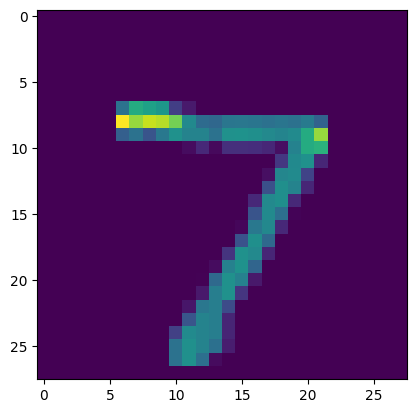

In [41]:
# Displaying the first image from the test dataset (x_test[0]) using Matplotlib.
# This will show the raw image in the default color scheme (grayscale for MNIST images).
plt.imshow(x_test[0])

In [42]:
# Using np.argmax to find the index of the highest probability in the 293rd prediction (index 292).
# This corresponds to the predicted class (digit 0-9) for the 293rd test image in the dataset.
# np.argmax returns the index of the highest probability in the prediction array.
print(np.argmax(predictions[292]))

9


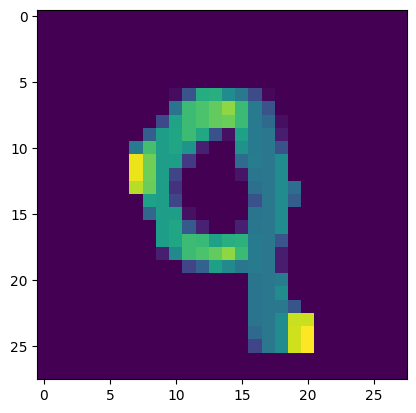

In [43]:
# Displaying the 293rd image from the test dataset (x_test[292]) using Matplotlib.
# This will show the raw image of the test sample corresponding to index 292 in the x_test array.
# The image will be shown in grayscale (the default color scheme for MNIST images).
plt.imshow(x_test[292])

In [44]:
# Importing the OpenCV library (cv2) for computer vision tasks.
# OpenCV provides various functions for image processing, object detection, and other computer vision operations.
import cv2

In [45]:
# Using OpenCV's imread function to read an image from a file ("jcd.png").
# The image is loaded into the variable 'img' as a NumPy array.
# This array contains the pixel data of the image, which can be processed or analyzed.
img = cv2.imread("jcd.png")

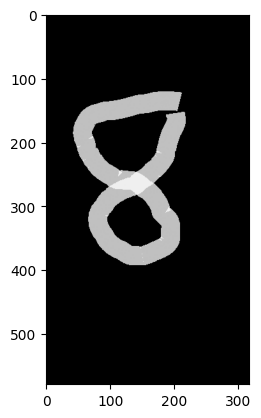

In [46]:
# Displaying the image loaded with OpenCV using Matplotlib.
# OpenCV loads images in BGR format by default, while Matplotlib expects RGB format.
# If the image appears with incorrect colors, we may need to convert it to RGB first.
plt.imshow(img)

In [50]:
# Displaying the shape of the image array 'img'.
# The shape will show the dimensions of the image as (height, width, channels).
# For color images, the 'channels' will be 3 (for RGB or BGR), and for grayscale images, it will be 1.
img.shape

(579, 318, 3)

In [51]:
# Converting the image from BGR (Blue-Green-Red) to grayscale using OpenCV's cvtColor function.
# cv2.COLOR_BGR2GRAY converts the BGR image to a single channel grayscale image.
# The result, 'gray', will have pixel values representing the intensity (brightness) of the image.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [52]:
# Displaying the shape of the grayscale image array 'gray'.
# Since the image is now single-channel (grayscale), the shape will be (height, width).
# There won't be a third dimension for color channels (like in RGB or BGR images).
gray.shape

(579, 318)

In [53]:
# Resizing the grayscale image 'gray' to a 28x28 pixel image.
# The interpolation method 'cv2.INTER_AREA' is used, which is best for reducing image size.
# It helps preserve the quality of the image when downsampling.
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [54]:
# Displaying the shape of the resized image array 'resized'.
# Since the image is now resized to 28x28 pixels, the shape will be (28, 28),
# indicating a single-channel grayscale image with 28 rows and 28 columns.
resized.shape

(28, 28)

In [55]:
# Normalizing the resized image 'resized' using TensorFlow's normalize function.
# The normalization scales the pixel values to a range between 0 and 1, improving model performance.
# The 'axis=1' argument ensures that the normalization is applied across the pixel values of the image.
newimg = tf.keras.utils.normalize(resized, axis=1)

In [56]:
# Reshaping the normalized image 'newimg' to match the input shape expected by the neural network.
# The reshaped image will have the shape (-1, 28, 28, 1), where:
# - '-1' indicates the number of images (in this case, 1 image).
# - '28' and '28' represent the height and width of the image.
# - '1' indicates that the image is single-channel (grayscale).
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [57]:
# Displaying the shape of the reshaped image 'newimg'.
# The shape will be (-1, 28, 28, 1), where:
# - '-1' indicates that there is one image in the batch (for inference, typically 1).
# - '28' and '28' are the dimensions of the image (height and width).
# - '1' indicates that it is a single-channel (grayscale) image.
newimg.shape

(1, 28, 28, 1)

In [58]:
# Using the trained model to make predictions on the reshaped image 'newimg'.
# The model will output the predicted probabilities for each of the 10 classes (0-9).
# The 'newimg' should be a 4D array of shape (1, 28, 28, 1) for a single image.
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [60]:
# Using np.argmax to find the index of the highest probability in the predictions array.
# np.argmax returns the index of the maximum value in the array, which corresponds to the predicted class (digit 0-9).
print(np.argmax(predictions))

8


# **TESTING**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Number is Identified as :  5


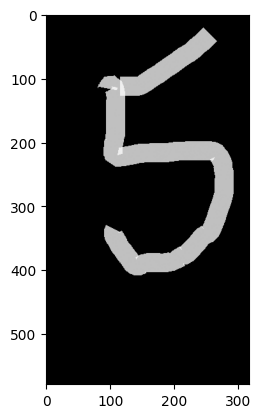

In [74]:
img = cv2.imread("untitled.png")  # Read image using OpenCV
plt.imshow(img)  # Display the image
img.shape  # Check the shape of the image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
gray.shape  # Check the shape of the grayscale image

resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)  # Resize to 28x28
resized.shape  # Check the shape of the resized image

newimg = tf.keras.utils.normalize(resized, axis=1)  # Normalize the image
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for the model
newimg.shape  # Check the shape of the reshaped image

predictions = model.predict(newimg)  # Make prediction
print("Number is Identified as : ", np.argmax(predictions))  # Print the predicted class (digit)
